In [1]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_great_wall

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=14, usetex=False)

X = fetch_great_wall()

/home/ufein/.virtualenvs/cosmo/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


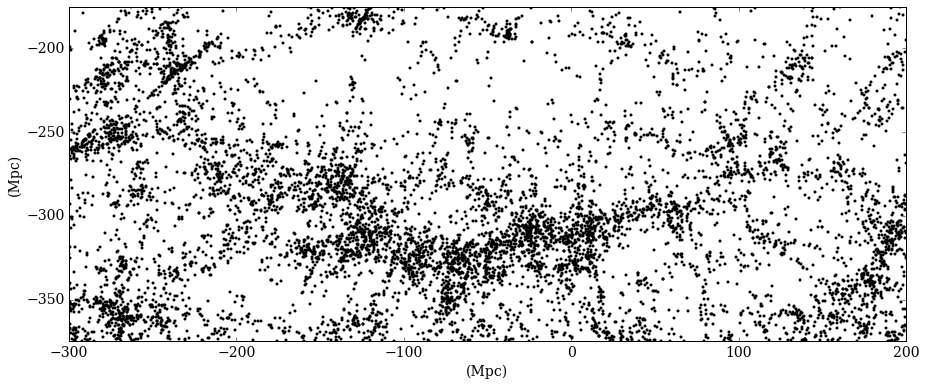

In [2]:
xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

fig = plt.figure(figsize=(15, 6))
plt.scatter(X[:, 1], X[:, 0], s=9, lw=0, c='k')
plt.xlim((ymin, ymax))
plt.ylim((xmin, xmax))
plt.xlabel('(Mpc)')
plt.ylabel('(Mpc)')

In [3]:
from sklearn.cluster import KMeans

In [55]:
n_clusters = 20
clf = KMeans(n_clusters)
clf.fit(X)
labels = clf.predict(X)

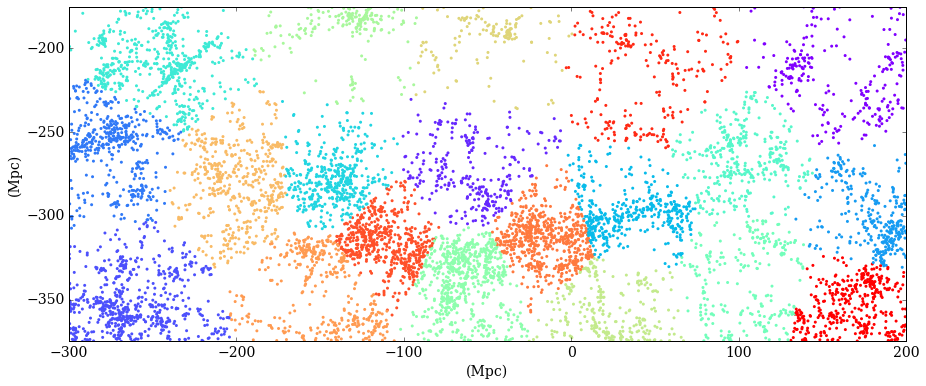

In [56]:
fig = plt.figure(figsize=(15, 6))

plt.scatter(X[:, 1], X[:, 0], s=9, lw=0, c=labels, cmap='rainbow')
#plt.plot(X[:,0],X[:,1],'k.')
plt.xlim((ymin, ymax))
plt.ylim((xmin, xmax))
plt.xlabel('(Mpc)')
plt.ylabel('(Mpc)')

In [57]:
# Make a grid and calculate the KMeans prediction for each point on it.
# The grid must cover the whole plot.
ngrid = (100, 250)
xbins = np.linspace(xmin, xmax, ngrid[0])
ybins = np.linspace(ymin, ymax, ngrid[1])
Xgrid = np.meshgrid(xbins, ybins)
Xgrid_flat = np.array([Xgrid[0].flatten(), Xgrid[1].flatten()]).T
H = clf.predict(Xgrid_flat).reshape(ngrid[::-1])

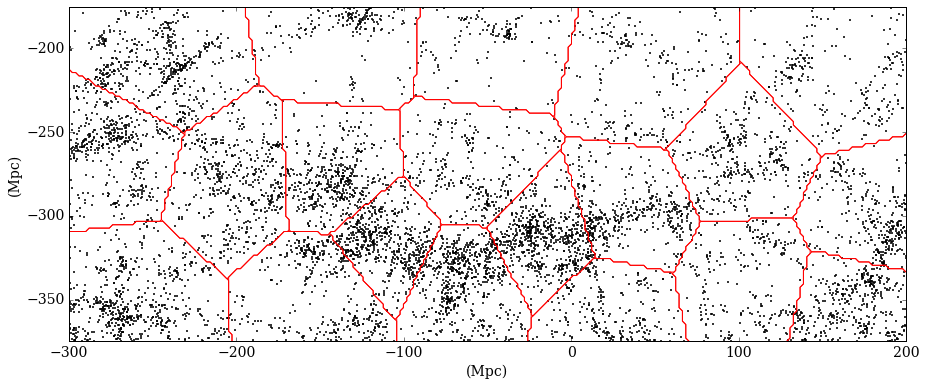

In [65]:
fig = plt.figure(figsize=(15, 6))

# Plot the data again
plt.scatter(X[:, 1], X[:, 0], s=4, lw=0, c='k')

# For each cluster plot the boundary separately by setting the cluster to 1 and the rest to 0, 
# and then drawing the countour at 0.5
for i in xrange(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0
    
    plt.contour(ybins, xbins, Hcp.T, [0.5], linewidths=1, colors='r')
    
plt.xlim((ymin, ymax))
plt.ylim((xmin, xmax))
plt.xlabel('(Mpc)')
plt.ylabel('(Mpc)')